In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("AABA.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
df1 = df.reset_index()['Close']
df1

0       40.91
1       40.97
2       41.53
3       43.21
4       43.42
        ...  
3014    71.58
3015    69.86
3016    70.06
3017    69.82
3018    69.85
Name: Close, Length: 3019, dtype: float64

In [5]:
df1.isnull().sum()

0

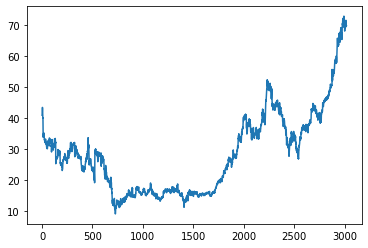

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
# LSTM are sensitive to scale of data so we scale our  data by MinMaxScaler

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1.shape

(3019, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_size,test_size=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
print(test_size.shape)
print(train_size.shape)

(1057, 1)
(1962, 1)


In [13]:
# Convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
    dataX, datay = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        datay.append(dataset[i + time_step,0])
    return numpy.array(dataX), numpy.array(datay)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_size, time_step)
X_test, y_test =  create_dataset(test_size, time_step)

In [15]:
print(X_train)

[[0.4995311  0.5004689  0.50922163 ... 0.34088778 0.35698656 0.37464833]
 [0.5004689  0.50922163 0.53547984 ... 0.35698656 0.37464833 0.37621132]
 [0.50922163 0.53547984 0.53876211 ... 0.37464833 0.37621132 0.36026883]
 ...
 [0.26680213 0.27164739 0.26758362 ... 0.38949672 0.39387309 0.3915286 ]
 [0.27164739 0.26758362 0.26351985 ... 0.39387309 0.3915286  0.38183807]
 [0.26758362 0.26351985 0.27164739 ... 0.3915286  0.38183807 0.37730541]]


In [16]:
print(X_test.shape)
print(y_test.shape)

(956, 100)
(956,)


In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [18]:
print(X_train.shape)
print(X_test.shape)

(1861, 100, 1)
(956, 100, 1)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [20]:
### Stack LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
30/30 [==============================] - 22s 399ms/step - loss: 0.0063 - val_loss: 0.0117
Epoch 2/50
30/30 [==============================] - 9s 287ms/step - loss: 7.3703e-04 - val_loss: 0.0044
Epoch 3/50
30/30 [==============================] - 9s 288ms/step - loss: 5.1220e-04 - val_loss: 0.0015
Epoch 4/50
30/30 [==============================] - 9s 297ms/step - loss: 4.6374e-04 - val_loss: 9.7901e-04
Epoch 5/50
30/30 [==============================] - 9s 300ms/step - loss: 4.5684e-04 - val_loss: 0.0022
Epoch 6/50
30/30 [==============================] - 9s 300ms/step - loss: 4.8187e-04 - val_loss: 0.0011
Epoch 7/50
30/30 [==============================] - 9s 301ms/step - loss: 4.9019e-04 - val_loss: 0.0021
Epoch 8/50
30/30 [==============================] - 9s 301ms/step - loss: 4.1608e-04 - val_loss: 0.0023
Epoch 9/50
30/30 [==============================] - 9s 305ms/step - loss: 3.9042e-04 - val_loss: 0.0020
Epoch 10/50
30/30 [==============================] - 9s 300ms/s

In [23]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

30/30 [==============================] - 2s 63ms/step


In [24]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

20.00614748866628

In [26]:
math.sqrt(mean_squared_error(y_test, test_predict))

40.39529325389197

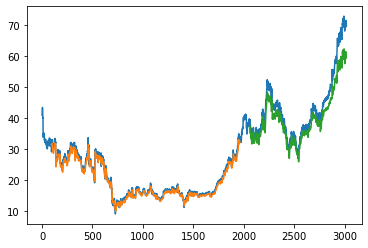

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
len(y_test)

956

In [35]:
x_input =y_test[856:].reshape(1,-1)

In [36]:
temp_input = list(input_data)
temp_input = temp_input[0].tolist()

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.7854471]
101
1 day input [0.79431072 0.76711472 0.76539544 0.78024383 0.7977493  0.80806502
 0.83229134 0.84588934 0.85417318 0.88261957 0.88887152 0.88386996
 0.86839637 0.85307909 0.84745233 0.86292591 0.86167552 0.86120663
 0.85823695 0.84979681 0.86073773 0.85386058 0.8782432  0.88168178
 0.89981244 0.89293529 0.89809315 0.90903407 0.91403564 0.9060644
 0.90090653 0.91262895 0.87542982 0.86745858 0.88855892 0.88512035
 0.89543607 0.89965614 0.91997499 0.91763051 0.9185683  0.92060019
 0.93451078 0.93748046 0.94201313 0.92153798 0.91544233 0.92356987
 0.90387621 0.91966239 0.91434823 0.91528603 0.89965614 0.90121913
 0.88230697 0.88496405 0.91544233 0.93638637 0.95608003 0.96342607
 0.96217568 0.95779931 0.98093154 0.98890278 0.9723351  0.95717412
 0.96280088 0.95842451 0.94670209 0.9452954  0.96592685 0.97014692
 0.98468271 0.99874961 0.99484214 1.         0.9865583  0.98515161
 0.9598312  0.95514223 0.95576743 0.92778993 0.92497656 0.94498281
 0.95764301 0.97374179 0.97811816 0

8 day output [[0.13985035]]
9 day input [0.85417318 0.88261957 0.88887152 0.88386996 0.86839637 0.85307909
 0.84745233 0.86292591 0.86167552 0.86120663 0.85823695 0.84979681
 0.86073773 0.85386058 0.8782432  0.88168178 0.89981244 0.89293529
 0.89809315 0.90903407 0.91403564 0.9060644  0.90090653 0.91262895
 0.87542982 0.86745858 0.88855892 0.88512035 0.89543607 0.89965614
 0.91997499 0.91763051 0.9185683  0.92060019 0.93451078 0.93748046
 0.94201313 0.92153798 0.91544233 0.92356987 0.90387621 0.91966239
 0.91434823 0.91528603 0.89965614 0.90121913 0.88230697 0.88496405
 0.91544233 0.93638637 0.95608003 0.96342607 0.96217568 0.95779931
 0.98093154 0.98890278 0.9723351  0.95717412 0.96280088 0.95842451
 0.94670209 0.9452954  0.96592685 0.97014692 0.98468271 0.99874961
 0.99484214 1.         0.9865583  0.98515161 0.9598312  0.95514223
 0.95576743 0.92778993 0.92497656 0.94498281 0.95764301 0.97374179
 0.97811816 0.95060957 0.9735855  0.94216943 0.95873711 0.95639262
 0.95748671 0.96827133

16 day output [[0.16753866]]
17 day input [0.86167552 0.86120663 0.85823695 0.84979681 0.86073773 0.85386058
 0.8782432  0.88168178 0.89981244 0.89293529 0.89809315 0.90903407
 0.91403564 0.9060644  0.90090653 0.91262895 0.87542982 0.86745858
 0.88855892 0.88512035 0.89543607 0.89965614 0.91997499 0.91763051
 0.9185683  0.92060019 0.93451078 0.93748046 0.94201313 0.92153798
 0.91544233 0.92356987 0.90387621 0.91966239 0.91434823 0.91528603
 0.89965614 0.90121913 0.88230697 0.88496405 0.91544233 0.93638637
 0.95608003 0.96342607 0.96217568 0.95779931 0.98093154 0.98890278
 0.9723351  0.95717412 0.96280088 0.95842451 0.94670209 0.9452954
 0.96592685 0.97014692 0.98468271 0.99874961 0.99484214 1.
 0.9865583  0.98515161 0.9598312  0.95514223 0.95576743 0.92778993
 0.92497656 0.94498281 0.95764301 0.97374179 0.97811816 0.95060957
 0.9735855  0.94216943 0.95873711 0.95639262 0.95748671 0.96827133
 0.97905595 0.97889966 0.95201626 0.95514223 0.95139106 0.78544712
 0.68323946 0.55006641 0.4243

24 day output [[0.14764775]]
25 day input [0.89981244 0.89293529 0.89809315 0.90903407 0.91403564 0.9060644
 0.90090653 0.91262895 0.87542982 0.86745858 0.88855892 0.88512035
 0.89543607 0.89965614 0.91997499 0.91763051 0.9185683  0.92060019
 0.93451078 0.93748046 0.94201313 0.92153798 0.91544233 0.92356987
 0.90387621 0.91966239 0.91434823 0.91528603 0.89965614 0.90121913
 0.88230697 0.88496405 0.91544233 0.93638637 0.95608003 0.96342607
 0.96217568 0.95779931 0.98093154 0.98890278 0.9723351  0.95717412
 0.96280088 0.95842451 0.94670209 0.9452954  0.96592685 0.97014692
 0.98468271 0.99874961 0.99484214 1.         0.9865583  0.98515161
 0.9598312  0.95514223 0.95576743 0.92778993 0.92497656 0.94498281
 0.95764301 0.97374179 0.97811816 0.95060957 0.9735855  0.94216943
 0.95873711 0.95639262 0.95748671 0.96827133 0.97905595 0.97889966
 0.95201626 0.95514223 0.95139106 0.78544712 0.68323946 0.55006641
 0.42438638 0.31915033 0.23967005 0.18643168 0.1552445  0.13985035
 0.1346119  0.1354878

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [42]:
df3 = df1.tolist()
df3.extend(lst_output)

In [44]:
len(df1)

3019

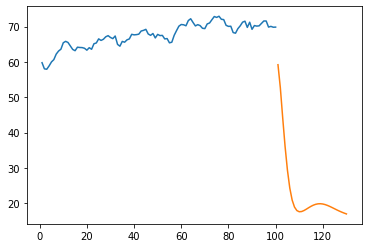

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[2919:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))